In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,LSTM

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
df = pd.read_csv('portland-oregon-average-monthly.csv')
df.head(10)

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
5,1960-06,622
6,1960-07,617
7,1960-08,613
8,1960-09,661
9,1960-10,695


In [3]:
df.columns = ['Month', 'Avg_Ridership']

In [4]:
df.head(10)

,Month,Avg_Ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
5,1960-06,622
6,1960-07,617
7,1960-08,613
8,1960-09,661
9,1960-10,695


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
Month            115 non-null object
Avg_Ridership    115 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


In [6]:
df.shape

(116, 2)

In [7]:
df.sample(10)

,Month,Avg_Ridership
57,1964-10,1222
36,1963-01,1102
51,1964-04,1182
107,1968-12,1329
48,1964-01,1209
1,1960-02,646
78,1966-07,1341
27,1962-04,910
18,1961-07,704
103,1968-08,1214


In [8]:
df.Avg_Ridership.unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', nan, ' n=114'], dtype=object)

In [9]:
df.Avg_Ridership = df.Avg_Ridership.replace(' n=114',np.nan)

In [10]:
df = df.dropna()

In [11]:
df['Avg_Ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327'], dtype=object)

In [12]:
df['Avg_Ridership'] = pd.to_numeric(df['Avg_Ridership'])

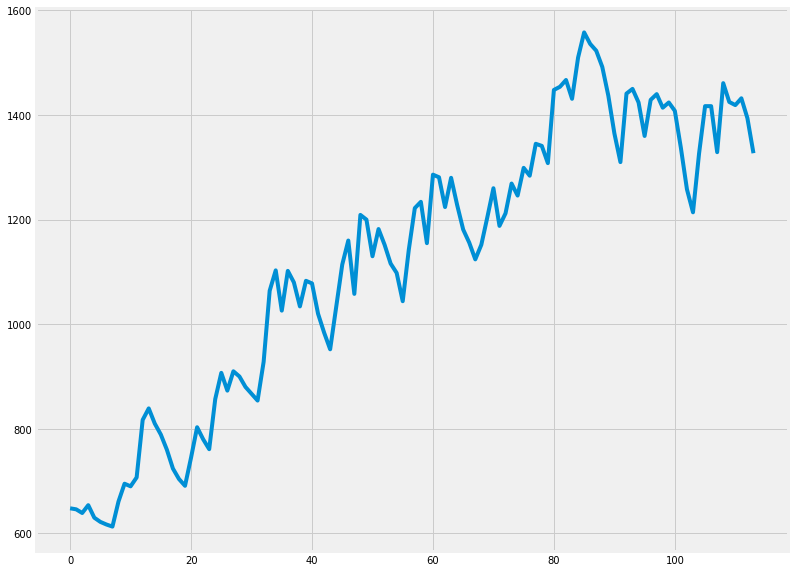

In [13]:
plt.figure(figsize=(12,10))
plt.plot(df.Avg_Ridership)
plt.show()

In [14]:
df = df['Avg_Ridership'].values
df = np.array(df).reshape(-1,1)
df[:10]

array([[648],
       [646],
       [639],
       [654],
       [630],
       [622],
       [617],
       [613],
       [661],
       [695]], dtype=int64)

In [15]:
sc = MinMaxScaler(feature_range=(0,1))
dataset = sc.fit_transform(df)

In [16]:
dataset[0:10]

array([[0.03703704],
       [0.03492063],
       [0.02751323],
       [0.04338624],
       [0.01798942],
       [0.00952381],
       [0.0042328 ],
       [0.        ],
       [0.05079365],
       [0.08677249]])

In [17]:
# Split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size: len(dataset),:]
print(len(train), len(test))

75 39


In [18]:
def create_dataset(S, look_back=1):
    dataX, dataY = [], []
    for i in range(len(S)-look_back-1):
        dataX.append(S[i:(i+look_back), 0])
        dataY.append(S[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
xtrain,ytrain = create_dataset(train, look_back=1)
xtrain.shape,ytrain.shape

((73, 1), (73,))

In [20]:
xtest,ytest = create_dataset(test, look_back=1)
xtest.shape,ytest.shape

((37, 1), (37,))

In [21]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], 1, xtrain.shape[1]))
xtest= np.reshape(xtest, (xtest.shape[0], 1, xtest.shape[1]))

In [22]:
look_back = 1
model = Sequential()
model.add(LSTM(128, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(xtrain, ytrain, epochs=100, batch_size=2,validation_data=(xtest,ytest), verbose=2)

Train on 73 samples, validate on 37 samples
Epoch 1/100
 - 4s - loss: 0.1078 - val_loss: 0.2452
Epoch 2/100
 - 0s - loss: 0.0306 - val_loss: 0.0707
Epoch 3/100
 - 0s - loss: 0.0200 - val_loss: 0.0588
Epoch 4/100
 - 0s - loss: 0.0167 - val_loss: 0.0417
Epoch 5/100
 - 0s - loss: 0.0132 - val_loss: 0.0298
Epoch 6/100
 - 0s - loss: 0.0110 - val_loss: 0.0194
Epoch 7/100
 - 0s - loss: 0.0092 - val_loss: 0.0150
Epoch 8/100
 - 0s - loss: 0.0067 - val_loss: 0.0088
Epoch 9/100
 - 0s - loss: 0.0057 - val_loss: 0.0058
Epoch 10/100
 - 0s - loss: 0.0051 - val_loss: 0.0072
Epoch 11/100
 - 1s - loss: 0.0044 - val_loss: 0.0047
Epoch 12/100
 - 0s - loss: 0.0041 - val_loss: 0.0043
Epoch 13/100
 - 0s - loss: 0.0039 - val_loss: 0.0043
Epoch 14/100
 - 0s - loss: 0.0046 - val_loss: 0.0044
Epoch 15/100
 - 0s - loss: 0.0040 - val_loss: 0.0044
Epoch 16/100
 - 0s - loss: 0.0045 - val_loss: 0.0047
Epoch 17/100
 - 0s - loss: 0.0038 - val_loss: 0.0045
Epoch 18/100
 - 0s - loss: 0.0043 - val_loss: 0.0046
Epoch 19/10

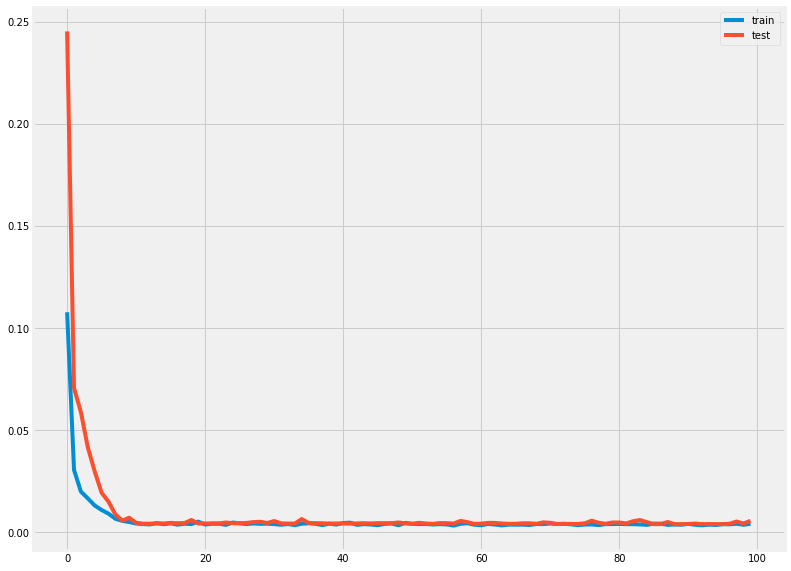

In [23]:
plt.figure(figsize = (12,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [24]:
pred = model.predict(xtest)
pred = sc.inverse_transform(pred)
pred[:10]

array([[1267.5514],
       [1253.3727],
       [1311.0264],
       [1307.2463],
       [1276.0581],
       [1408.3029],
       [1413.9652],
       [1426.2313],
       [1392.2568],
       [1466.7817]], dtype=float32)

In [25]:
ytest = np.array(ytest).reshape(-1,1)
ytest = sc.inverse_transform(ytest)
ytest[:10]

array([[1284.],
       [1345.],
       [1341.],
       [1308.],
       [1448.],
       [1454.],
       [1467.],
       [1431.],
       [1510.],
       [1558.]])

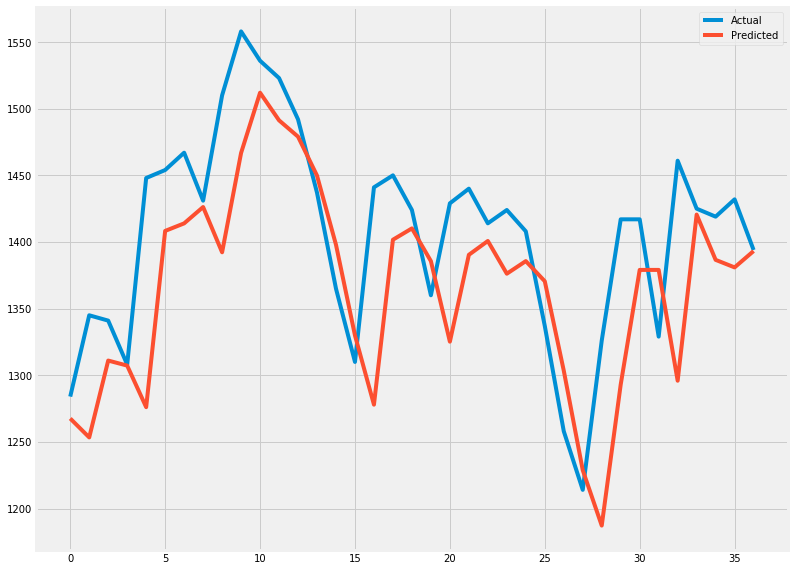

In [26]:
plt.figure(figsize = (12,10))
plt.plot(ytest, label ='Actual')
plt.plot(pred, label ='Predicted')
plt.legend()